In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
import scipy.stats as sp
from arch import arch_model
from arch.univariate import ZeroMean,GARCH,Normal,EWMAVariance

In [2]:
df=pd.read_excel("data.xlsx" ,index_col=0, parse_dates=True)

In [3]:
df

,Equities,Tsies,CorpIG,AbsReturn,Gold,Oil
date,,,,,,
1986-10-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1986-11-03,100.621000,100.350693,100.169884,99.888000,101.296758,96.393443
1986-11-04,100.853435,100.210050,100.336838,100.069796,101.745636,98.688525
1986-11-05,101.086406,100.703160,100.503793,100.616177,101.059850,97.901639
1986-11-06,100.865027,100.138867,100.480361,100.714781,101.882793,98.885246
...,...,...,...,...,...,...
2021-10-25,4081.420245,152.128638,1029.079406,1609.593575,450.187032,555.016393
2021-10-26,4083.052813,152.268491,1031.343546,1600.354508,445.274314,561.573770
2021-10-27,4052.021612,153.534099,1038.844791,1589.936200,447.693267,542.032787


# Creating Returns and Analysing results

In [4]:
df_d_ret=df/df.shift(1)-1
df_d_ret.dropna(inplace=True)
df_d_ret

,Equities,Tsies,CorpIG,AbsReturn,Gold,Oil
date,,,,,,
1986-11-03,0.00621,0.003507,0.001699,-0.00112,0.012968,-0.036066
1986-11-04,0.00231,-0.001402,0.001667,0.00182,0.004431,0.023810
1986-11-05,0.00231,0.004921,0.001664,0.00546,-0.006740,-0.007973
1986-11-06,-0.00219,-0.005604,-0.000233,0.00098,0.008143,0.010047
1986-11-07,0.00001,-0.005583,-0.002303,0.00252,-0.000857,0.004642
...,...,...,...,...,...,...
2021-10-25,0.00580,0.001838,0.001437,-0.00630,-0.001659,0.001301
2021-10-26,0.00040,0.000919,0.002200,-0.00574,-0.010913,0.011815
2021-10-27,-0.00760,0.008312,0.007273,-0.00651,0.005432,-0.034797


In [5]:
df_d_ret_2=df_d_ret+1
df_monthly_ret=df_d_ret_2.groupby(pd.Grouper(freq='M')).prod()-1
df_monthly_ret

,Equities,Tsies,CorpIG,AbsReturn,Gold,Oil
date,,,,,,
1986-11-30,0.015783,0.013404,0.017311,0.015520,-0.028678,-0.016393
1986-12-31,-0.028032,-0.005662,0.011171,0.013714,-0.001926,0.195333
1987-01-31,0.128832,0.003491,0.015917,-0.022385,0.030225,0.044618
1987-02-28,0.048564,-0.000733,0.007259,-0.057454,0.013358,-0.121730
1987-03-31,0.020713,-0.022195,-0.005064,0.053161,0.037329,0.144073
...,...,...,...,...,...,...
2021-06-30,0.027363,0.012022,0.016835,-0.072918,-0.072002,0.108732
2021-07-31,0.012483,0.019682,0.012074,0.022422,0.035505,0.005577
2021-08-31,0.029175,-0.005652,-0.001959,-0.014198,-0.005970,-0.074395


In [6]:
weights=pd.DataFrame(index=["weights"],columns=df.columns,data=[[0.5,0.25,0.05,0.12,0.05,0.03]])

In [7]:
weights

,Equities,Tsies,CorpIG,AbsReturn,Gold,Oil
weights,0.5,0.25,0.05,0.12,0.05,0.03


In [8]:
portfolio_ret_d=pd.DataFrame(index=df_d_ret.index,columns=["ret"], data=np.dot(df_d_ret,weights.T)).dropna()

In [9]:
portfolio_ret_m=pd.DataFrame(index=df_monthly_ret.index,columns=["ret"], data=np.dot(df_monthly_ret,weights.T))

<AxesSubplot:xlabel='date'>

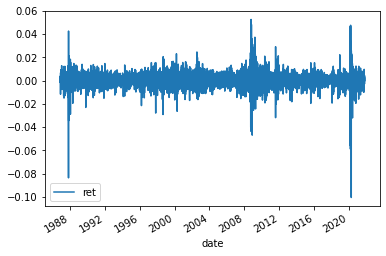

In [10]:
portfolio_ret_d.plot()

array([[<AxesSubplot:title={'center':'ret'}>]], dtype=object)

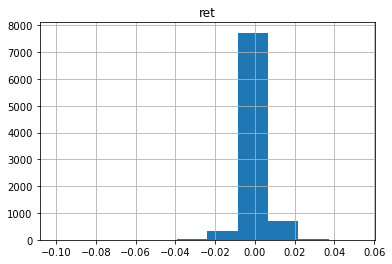

In [11]:
portfolio_ret_d.hist()

In [12]:
mean=portfolio_ret_d['ret'].mean()
std=portfolio_ret_d['ret'].std()
max_ = portfolio_ret_d['ret'].max()
min_ = portfolio_ret_d['ret'].min()
kurt = sp.kurtosis(portfolio_ret_d['ret'])
skew = sp.skew(portfolio_ret_d['ret'])

In [13]:
normalized_portfolio_ret=(portfolio_ret_d-mean)/std

In [14]:
normalized_portfolio_ret

,ret
date,
1986-11-03,0.551166
1986-11-04,0.297985
1986-11-05,0.385799
1986-11-06,-0.349289
1986-11-07,-0.249476
...,...
2021-10-25,0.400394
2021-10-26,-0.116143
2021-10-27,-0.563191


In [15]:
mean_norm = normalized_portfolio_ret['ret'].mean()
std_norm = normalized_portfolio_ret['ret'].std()
max_norm = normalized_portfolio_ret['ret'].max()
min_norm = normalized_portfolio_ret['ret'].min()
kurt_norm = sp.kurtosis(normalized_portfolio_ret['ret'])
skew_norm = sp.skew(normalized_portfolio_ret['ret'])

# Fitting Garch Model

In [16]:
model_garch = arch_model(y=portfolio_ret_d['ret']*100, rescale=True, mean='Zero')
res_garch = model_garch.fit(100)
res_garch

Optimization terminated successfully    (Exit mode 0)
            Current function value: 5699.068546236962
            Iterations: 9
            Function evaluations: 45
            Gradient evaluations: 9


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5699.07
Distribution:                  Normal   AIC:                           11404.1
Method:            Maximum Likelihood   BIC:                           11425.4
                                        No. Observations:                 8820
Date:                Thu, Jan 27 2022   Df Residuals:                     8820
Time:                        11:06:09   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.0920e-03  1.236e-03      4.118  3.813e-05 [2.

In [17]:
scale = res_garch.scale
scale

1.0

In [18]:
forecasts_garch = res_garch.forecast(horizon=1)

C:\Users\apala\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [19]:
vol_garch_for = (forecasts_garch.variance.iloc[-1]/10000)**0.5

In [20]:
std

0.005752715159760153

In [21]:
vol_garch_for

h.1    0.003758
Name: 2021-10-29 00:00:00, dtype: float64

# Fitting EWMA Model

In [22]:
am = ZeroMean(portfolio_ret_d['ret']*100)
am.volatility = EWMAVariance(None)
am.distribution = Normal()
res = am.fit()
res

Iteration:      1,   Func. Count:      3,   Neg. LLF: 128694789.71589002
Iteration:      2,   Func. Count:      7,   Neg. LLF: 5803.0148244820975
Iteration:      3,   Func. Count:      9,   Neg. LLF: 5803.006571305573
Iteration:      4,   Func. Count:     11,   Neg. LLF: 5803.00651967235
Iteration:      5,   Func. Count:     12,   Neg. LLF: 5803.0065196720125
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5803.00651967235
            Iterations: 5
            Function evaluations: 12
            Gradient evaluations: 5


                  Zero Mean - EWMA/RiskMetrics Model Results                  
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:           EWMA/RiskMetrics   Log-Likelihood:               -5803.01
Distribution:                  Normal   AIC:                           11608.0
Method:            Maximum Likelihood   BIC:                           11615.1
                                        No. Observations:                 8820
Date:                Thu, Jan 27 2022   Df Residuals:                     8820
Time:                        11:06:10   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
lam            0.9344  7.430e-03    125.758      0.000 [  0.920,  0.94

In [23]:
forecasts_res = res.forecast(horizon=1)
vol_ewma_for = (forecasts_res.variance.iloc[-1]/10000)**0.5

vol_ewma_for

C:\Users\apala\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


h.1    0.003701
Name: 2021-10-29 00:00:00, dtype: float64

# Definging Garch and Emwa Volatilities
# Definging Forecast Parameters: Omega, Alpha, Beta, Lambda

In [24]:
forc_vol_emwa = (forecasts_res.variance.iloc[-1]/10000)**0.5

In [25]:
forc_vol_garch = (forecasts_garch.variance.iloc[-1]/10000)**0.5

In [26]:
omega = res_garch.params[0]/10000
alpha = res_garch.params[1]
beta = res_garch.params[2]
lamb = res.params[0]

## Cerating DataFrame with Emua weights

In [27]:
L_weights_emwa = []

In [28]:
for t in range(0, len(portfolio_ret_d)):
    L_weights_emwa.append((lamb**t)*(1-lamb))

In [29]:
L_weights_emwa.reverse()

In [30]:
weights_emwa = pd.DataFrame(columns=['weights', 'acum_weights'])
weights_emwa['weights'] = L_weights_emwa

In [31]:
for y in range(0, len(weights_emwa)):
    if y==0:
        weights_emwa.iloc[y, 1] = weights_emwa.iloc[y, 0]
    else: weights_emwa.iloc[y, 1] = weights_emwa.iloc[y-1, 1] + weights_emwa.iloc[y, 0]

In [32]:
weights_emwa.index=portfolio_ret_d.index
weights_emwa

,weights,acum_weights
date,,
1986-11-03,8.678057e-262,0.0
1986-11-04,9.287322e-262,0.0
1986-11-05,9.939362e-262,0.0
1986-11-06,1.063718e-261,0.0
1986-11-07,1.138399e-261,0.0
...,...,...
2021-10-25,5.000851e-02,0.762303
2021-10-26,5.351948e-02,0.815823
2021-10-27,5.727696e-02,0.8731


# Preparing DataFrame to generate data (portfolio_ret_d)

### Columns: Returns, Conditional Var Garch, Conditional Var Emwa, Conditional Vol Garch, Conditonal Vol Emwa, Model Vol Garch, Model Emwa, Z-Garch, Z-Emwa, Returns Garch, Returns Emwa

In [33]:
portfolio_ret_d['cond_var_garch'] = 0
portfolio_ret_d['cond_var_emwa'] = 0
portfolio_ret_d['cond_vol_garch'] = 0
portfolio_ret_d['cond_vol_emwa'] = 0
portfolio_ret_d['model_vol_garch'] = 0
portfolio_ret_d['model_vol_emwa'] = 0
portfolio_ret_d['z_garch'] = 0
portfolio_ret_d['z_emwa'] = 0
portfolio_ret_d['resc_r_garch'] = 0
portfolio_ret_d['resc_r_emwa'] = 0

# Looping on data to generate Rescaled Returns on Garch and Emwa

In [34]:
for i in range(0,len(portfolio_ret_d)):
    if i == 0:
        portfolio_ret_d.iloc[i,1] = portfolio_ret_d.iloc[i,0]**2
    else: portfolio_ret_d.iloc[i,1] = omega + alpha*portfolio_ret_d.iloc[i-1,0]**2  + beta*portfolio_ret_d.iloc[i-1,1] 

In [35]:
for z in range(0,len(portfolio_ret_d)):
    if z == 0:
        portfolio_ret_d.iloc[z, 2] = portfolio_ret_d.iloc[z, 0]**2
    else: portfolio_ret_d.iloc[z, 2] = (1 - lamb)*portfolio_ret_d.iloc[z-1, 0]**2 + lamb*portfolio_ret_d.iloc[z-1, 2]

In [36]:
portfolio_ret_d['cond_vol_garch'] = portfolio_ret_d['cond_var_garch']**(1/2)
portfolio_ret_d['cond_vol_emwa'] = portfolio_ret_d['cond_var_emwa']**(1/2)

<AxesSubplot:xlabel='date'>

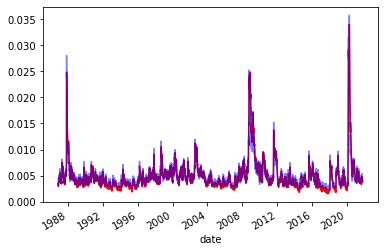

In [37]:
portfolio_ret_d['cond_vol_emwa'].plot(c='red')
portfolio_ret_d['cond_vol_garch'].plot(c='blue', alpha=0.5)

<AxesSubplot:xlabel='date'>

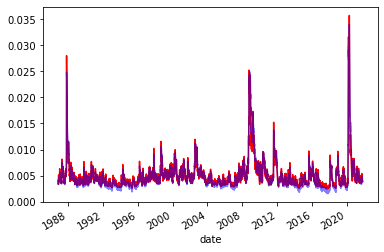

In [38]:
(((res_garch.conditional_volatility**2)/10000)**0.5).plot(c='red')
(((res.conditional_volatility**2)/10000)**0.5).plot(c='blue', alpha=0.5)

<AxesSubplot:xlabel='date'>

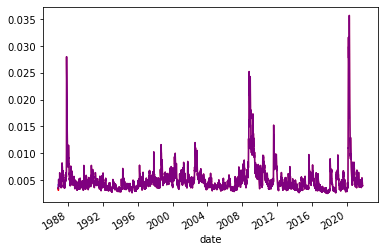

In [39]:
portfolio_ret_d['cond_vol_garch'].plot(c='red')
(((res_garch.conditional_volatility**2)/10000)**0.5).plot(c='blue', alpha=0.5)

<AxesSubplot:xlabel='date'>

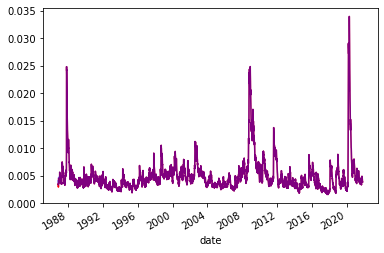

In [40]:
portfolio_ret_d['cond_vol_emwa'].plot(c='red')
(((res.conditional_volatility**2)/10000)**0.5).plot(c='blue', alpha=0.5)

In [41]:
portfolio_ret_d['model_vol_garch']=((res_garch.conditional_volatility**2)/10000)**0.5
portfolio_ret_d['model_vol_emwa']=((res.conditional_volatility**2)/10000)**0.5

In [42]:
portfolio_ret_d['z_garch'] = portfolio_ret_d['ret']/portfolio_ret_d['cond_vol_garch']
portfolio_ret_d['z_emwa'] = portfolio_ret_d['ret']/portfolio_ret_d['cond_vol_emwa']

In [43]:
for g in range(0, len(portfolio_ret_d)-1):
    portfolio_ret_d.iloc[g, 9] = portfolio_ret_d.iloc[g,7] * forc_vol_emwa

In [44]:
for h in range(0, len(portfolio_ret_d)-1):
    portfolio_ret_d.iloc[h, 10] = portfolio_ret_d.iloc[h,8] * forc_vol_garch

In [45]:
portfolio_ret_d

,ret,cond_var_garch,cond_var_emwa,cond_vol_garch,cond_vol_emwa,model_vol_garch,model_vol_emwa,z_garch,z_emwa,resc_r_garch,resc_r_emwa
date,,,,,,,,,,,
1986-11-03,0.003499,0.000012,0.000012,0.003499,0.003499,0.004085,0.004059,1.000000,1.000000,0.003701,0.003758
1986-11-04,0.002042,0.000013,0.000012,0.003539,0.003499,0.004061,0.004025,0.576997,0.583707,0.002135,0.002194
1986-11-05,0.002547,0.000012,0.000012,0.003471,0.003422,0.003946,0.003926,0.733950,0.744370,0.002716,0.002797
1986-11-06,-0.001681,0.000012,0.000011,0.003439,0.003372,0.003869,0.003851,-0.488859,-0.498664,-0.001809,-0.001874
1986-11-07,-0.001107,0.000011,0.000011,0.003362,0.003288,0.003755,0.003747,-0.329333,-0.336773,-0.001219,-0.001266
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,0.002631,0.000017,0.000016,0.004125,0.004054,0.004125,0.004054,0.637933,0.649121,0.002361,0.002440
2021-10-26,-0.000340,0.000016,0.000016,0.004036,0.003976,0.004036,0.003976,-0.084270,-0.085551,-0.000312,-0.000322
2021-10-27,-0.002912,0.000015,0.000015,0.003877,0.003844,0.003877,0.003844,-0.751085,-0.757445,-0.002780,-0.002847


In [46]:
mean_garch = portfolio_ret_d['z_garch'].mean()
std_garch = portfolio_ret_d['z_garch'].std()
max_garch = portfolio_ret_d['z_garch'].max() 
min_garch = portfolio_ret_d['z_garch'].min()
kurt_garch = sp.kurtosis(portfolio_ret_d['z_garch'])
skew_garch = sp.skew(portfolio_ret_d['z_garch'])

In [47]:
mean_ewma = portfolio_ret_d['z_emwa'].mean()
std_ewma = portfolio_ret_d['z_emwa'].std()
max_ewma = portfolio_ret_d['z_emwa'].max() 
min_ewma = portfolio_ret_d['z_emwa'].min()
kurt_ewma = sp.kurtosis(portfolio_ret_d['z_emwa'])
skew_ewma = sp.skew(portfolio_ret_d['z_emwa'])

## Statistics Table

In [48]:
df_stats = pd.DataFrame(index=['min', 'max', 'mean', 'kurtosis', 'skewness'])

In [49]:
df_stats['Ret'] = [min_, max_, mean, kurt, skew]
df_stats['Norm'] = [min_norm, max_norm, mean_norm, kurt_norm, skew_norm]
df_stats['Garch'] = [min_garch, max_garch, mean_garch, kurt_garch, skew_garch]
df_stats['Ewma'] = [min_ewma, max_ewma, mean_ewma, kurt_ewma, skew_ewma]

df_stats.round(3)

,Ret,Norm,Garch,Ewma
min,-0.101,-17.550,-8.294,-9.176
max,0.053,9.078,4.157,4.464
mean,0.000,-0.000,0.072,0.076
kurtosis,26.612,26.612,2.335,2.960
skewness,-1.372,-1.372,-0.503,-0.574


# Prepating new DataFrame to generate risk measures

In [50]:
df_returns = pd.DataFrame()

In [51]:
df_returns['Returns'] = portfolio_ret_d['ret']
df_returns['Returns_Garch'] = portfolio_ret_d['resc_r_garch']
df_returns['Returns_Emwa'] = portfolio_ret_d['resc_r_emwa']

df_returns

,Returns,Returns_Garch,Returns_Emwa
date,,,
1986-11-03,0.003499,0.003701,0.003758
1986-11-04,0.002042,0.002135,0.002194
1986-11-05,0.002547,0.002716,0.002797
1986-11-06,-0.001681,-0.001809,-0.001874
1986-11-07,-0.001107,-0.001219,-0.001266
...,...,...,...
2021-10-25,0.002631,0.002361,0.002440
2021-10-26,-0.000340,-0.000312,-0.000322
2021-10-27,-0.002912,-0.002780,-0.002847


## Generating Risk Measures for each Look-back Period

In [52]:
df_risk_measures = pd.DataFrame(index=['VaR_PreC','VaR_PostC','ES_PreC','ES_PostC'], columns=['Param', 'Hist', 'Fhist_G', 'Fhist_E', 'Whist'])

In [53]:
df_505 = df_returns.iloc[-505:,:]

df_505

,Returns,Returns_Garch,Returns_Emwa
date,,,
2019-10-30,0.001384,0.001523,0.001542
2019-10-31,0.000226,0.000255,0.000259
2019-11-01,0.006176,0.007194,0.007319
2019-11-04,0.002479,0.002547,0.002701
2019-11-05,-0.001856,-0.001933,-0.002056
...,...,...,...
2021-10-25,0.002631,0.002361,0.002440
2021-10-26,-0.000340,-0.000312,-0.000322
2021-10-27,-0.002912,-0.002780,-0.002847


In [407]:
lb_505_vol= ((df_505['Returns']**2).mean())**0.5

In [408]:
var_param = sp.norm.ppf(0.95)*lb_505_vol

In [409]:
es_param = sp.norm.pdf(sp.norm.ppf(0.95))*lb_505_vol/0.05

In [410]:
var_505_hist = df_505['Returns'].quantile(q=0.05)

In [411]:
es_505_hist = (df_505['Returns'][(df_505['Returns']<df_505['Returns'].quantile(q=0.05))]).mean()

In [412]:
var_505_fhist_g = df_505['Returns_Garch'].quantile(q=0.05)

In [413]:
es_505_fhist_g = (df_505['Returns_Garch'][(df_505['Returns_Garch']<df_505['Returns_Garch'].quantile(q=0.05))]).mean()

In [414]:
var_505_fhist_e = df_505['Returns_Emwa'].quantile(q=0.05)

In [415]:
es_505_fhist_e = (df_505['Returns_Emwa'][(df_505['Returns_Emwa']<df_505['Returns_Emwa'].quantile(q=0.05))]).mean()

In [416]:
weights_emwa_505=weights_emwa.loc[df_505.index,:]
adj=lamb**505
n_w=weights_emwa_505['weights']/(1-adj)
df_505['weights']=n_w
df_505['weights'].sum()

1.0

In [417]:
df_505.sort_values('Returns', inplace=True)
df_505['acum_weights'] = 0

for y in range(0, len(df_505.index)):
    if y==0:
        df_505.iloc[y, 4] = df_505.iloc[y, 3]
    else: df_505.iloc[y, 4] = df_505.iloc[y-1, 4] + df_505.iloc[y, 3]

In [418]:
w_hist_df=df_505[df_505['acum_weights']<=0.05]

hr_=df_505.iloc[len(w_hist_df),0]
hw_=df_505.iloc[len(w_hist_df),4]
lr_=w_hist_df.iloc[-1,0]
lw_=w_hist_df.iloc[-1,4]

w_hist_VaR=lr_+(0.05-lw_)/(hw_-lw_)*(hr_-lr_)
w_hist_ES=(w_hist_df['Returns']*w_hist_df['acum_weights']).sum()/0.05

In [419]:
VaR_505 = [var_param, -var_505_hist, -var_505_fhist_g, -var_505_fhist_e, -w_hist_VaR]
ES_505 = [es_param, -es_505_hist, -es_505_fhist_g, -es_505_fhist_e, -w_hist_ES]

In [420]:
df_risk_measures.loc['VaR_PreC']=VaR_505
df_risk_measures.loc['ES_PreC']=ES_505

In [421]:
df_risk_measures

,Param,Hist,Fhist_G,Fhist_E,Whist
VaR_PreC,0.016628,0.010853,0.006311,0.006742,0.005403
VaR_PostC,0.007547,0.006224,0.005375,0.005638,0.005403
ES_PreC,0.020853,0.027481,0.010378,0.010844,0.105011
ES_PostC,0.009465,0.009036,0.007973,0.008318,0.105011


### PostCovid

In [69]:
df_252 = df_returns.iloc[-252:,:]

df_252

,Returns,Returns_Garch,Returns_Emwa
date,,,
2020-10-30,-0.006262,-0.003102,-0.003244
2020-11-02,0.008737,0.004409,0.004564
2020-11-03,0.009758,0.004852,0.005019
2020-11-04,0.009427,0.004561,0.004729
2020-11-05,0.012445,0.005910,0.006127
...,...,...,...
2021-10-25,0.002631,0.002361,0.002440
2021-10-26,-0.000340,-0.000312,-0.000322
2021-10-27,-0.002912,-0.002780,-0.002847


In [396]:
lb_252_vol= ((df_252['Returns']**2).mean())**0.5

In [402]:
var_param = sp.norm.ppf(0.95)*lb_252_vol

In [403]:
es_param = sp.norm.pdf(sp.norm.ppf(0.95))*lb_252_vol/0.05

In [73]:
var_252_hist = df_252['Returns'].quantile(q=0.05)

In [74]:
es_252_hist = (df_252['Returns'][(df_252['Returns']<df_252['Returns'].quantile(q=0.05))]).mean()

In [75]:
var_252_fhist_g = df_252['Returns_Garch'].quantile(q=0.05)

In [76]:
es_252_fhist_g = (df_252['Returns_Garch'][(df_252['Returns_Garch']<df_252['Returns_Garch'].quantile(q=0.05))]).mean()

In [77]:
var_252_fhist_e = df_252['Returns_Emwa'].quantile(q=0.05)

In [78]:
es_252_fhist_e = (df_252['Returns_Emwa'][(df_252['Returns_Emwa']<df_252['Returns_Emwa'].quantile(q=0.05))]).mean()

In [174]:
weights_emwa_252=weights_emwa.loc[df_252.index,:]
adj=lamb**252
n_w=weights_emwa_252['weights']/(1-adj)
df_252['weights']=n_w
df_252['weights'].sum()

<ipython-input-174-42dd3c3fa201>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_252['weights']=n_w


1.0

In [175]:
df_252.sort_values('Returns', inplace=True)
df_252['acum_weights'] = 0

for y in range(0, len(df_252.index)):
    if y==0:
        df_252.iloc[y, 4] = df_252.iloc[y, 3]
    else: df_252.iloc[y, 4] = df_252.iloc[y-1, 4] + df_252.iloc[y, 3]

<ipython-input-175-e2679b477d2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_252.sort_values('Returns', inplace=True)
<ipython-input-175-e2679b477d2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_252['acum_weights'] = 0
C:\Users\apala\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [190]:
w_hist_df=df_252[df_252['acum_weights']<=0.05]

hr_=df_252.iloc[len(w_hist_df),0]
hw_=df_252.iloc[len(w_hist_df),4]
lr_=w_hist_df.iloc[-1,0]
lw_=w_hist_df.iloc[-1,4]

w_hist_VaR=lr_+(0.05-lw_)/(hw_-lw_)*(hr_-lr_)
w_hist_ES=(w_hist_df['Returns']*w_hist_df['acum_weights']).sum()/0.05

In [404]:
VaR_252 = [var_param, -var_252_hist, -var_252_fhist_g, -var_252_fhist_e, -w_hist_VaR]
ES_252 = [es_param, -es_252_hist, -es_252_fhist_g, -es_252_fhist_e, -w_hist_ES]

In [405]:
df_risk_measures.loc['VaR_PostC']=VaR_252
df_risk_measures.loc['ES_PostC']=ES_252

In [406]:
df_risk_measures

,Param,Hist,Fhist_G,Fhist_E,Whist
VaR_PreC,0.000035,0.010853,0.006311,0.006742,0.005403
VaR_PostC,0.007547,0.006224,0.005375,0.005638,0.005403
ES_PreC,0.000043,0.027481,0.010378,0.010844,0.105011
ES_PostC,0.009465,0.009036,0.007973,0.008318,0.105011


# Evaluation of volatility

In [155]:
df_eval = portfolio_ret_d.iloc[504:,:]
bias_garch =  df_eval['z_garch'].std()
bias_ewma =  df_eval['z_emwa'].std()

df_bias = pd.DataFrame(index=['Stdv'], columns=['Garch', 'EWMA'], data= [[bias_garch,bias_ewma]])
df_bias 

,Garch,EWMA
Stdv,0.99176,1.050151


In [157]:
low_interval_confidence = 1-(2/((len(portfolio_ret_d)-505)))**0.5
high_interval_confidence = 1+(2/((len(portfolio_ret_d)-505)))**0.5

df_bias_int = pd.DataFrame(index=['95% Confidence Intervals'], columns=['Low Interval', 'High Interval'], data= [[low_interval_confidence, hihg_interval_confidence]])
df_bias_int 

,Low Interval,High Interval
95% Confidence Intervals,0.984491,1.015509


In [164]:
df_eval[['garch_std','ewma_std']] = 5
z = []

for i in range(0,len(df_eval)):
    z.append(portfolio_ret_d.iloc[i:504+i,7].std())
    
df_eval['garch_std'] = z

<ipython-input-164-a3b0c3cc9540>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval[['garch_std','ewma_std']] = 5
C:\Users\apala\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-164-a3b0c3cc9540>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [166]:
y = []

for i in range(0,len(df_eval)):
    y.append(portfolio_ret_d.iloc[i:504+i,8].std())
    
df_eval['ewma_std'] = y

<ipython-input-166-81b0d8304c17>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['ewma_std'] = y


In [167]:
bias_garch_2 = (df_eval['garch_std']-1).mean()
bias_ewma_2 = (df_eval['ewma_std']-1).mean()

df_MRAD = pd.DataFrame(index=['MRAD'], columns=['Garch', 'EWMA'], data= [[bias_garch_2,bias_ewma_2]])
df_MRAD 

,Garch,EWMA
MRAD,-0.007807,0.051586


In [168]:
skew_garch =  sp.skew(df_eval['z_garch'])
skew_ewma =  sp.skew(df_eval['z_emwa'])
skew_ret =  sp.skew(df_eval['ret'])
kurt_garch =  sp.kurtosis(df_eval['z_garch'])
kurt_ewma =  sp.kurtosis(df_eval['z_emwa'])
kurt_ret =  sp.kurtosis(df_eval['ret'])

zg_mn=df_eval['z_garch'].mean()
ze_mn=df_eval['z_garch'].mean()
r_mn=df_eval['ret'].mean()
zg_mdn=df_eval['z_emwa'].median()
ze_mdn=df_eval['z_emwa'].median()
r_mdn=df_eval['ret'].median()

r_skew_garch =  (zg_mn-zg_mdn)/bias_garch
r_skew_ewma =  (ze_mn-ze_mdn)/bias_ewma
r_skew_r = (r_mn-r_mdn)/df_eval['ret'].std()

df_dist = pd.DataFrame(index=['Skew','Robust Skew','Kurtosis'], columns=['Ret','Garch', 'EWMA'], data= [[skew_ret,skew_garch,skew_ewma],[r_skew_r,r_skew_garch,r_skew_ewma],[kurt_ret,kurt_garch,kurt_ewma]])
df_dist

,Ret,Garch,EWMA
Skew,-1.148201,-0.457597,-0.521012
Robust Skew,-0.033116,-0.055374,-0.052295
Kurtosis,23.994012,1.873718,2.413744


In [170]:
df_eval[['QL_G','QL_E','d']] = 5

df_eval['QL_G']=np.log(df_eval['z_garch']**2)-df_eval['z_garch']**2
df_eval['QL_E']=np.log(df_eval['z_emwa']**2)-df_eval['z_emwa']**2
df_eval['d'] = df_eval['QL_G'] - df_eval['QL_E']

mean_d = df_eval['d'].mean()
std_d = df_eval['d'].std()/((len(portfolio_ret_d)-505)**0.5)
t_d = mean_d/std_d

df_QL = pd.DataFrame(index=['Sum_QL','Avg_d','t_d'], columns=['Garch', 'EWMA', 'A-B'], data= [[df_eval['QL_G'].sum(),df_eval['QL_E'].sum(),''],['','',mean_d],['','',t_d]])
df_QL

<ipython-input-170-74502c1261f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval[['QL_G','QL_E','d']] = 5
C:\Users\apala\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-170-74502c1261f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Garch,EWMA,A-B
Sum_QL,-20457.054911,-20634.34863,
Avg_d,,,0.02132
t_d,,,3.226644


# Evaluation of VaR

In [204]:
import warnings
warnings.filterwarnings("ignore")

In [342]:
df_eval[['p_VaR_t','h_VaR_t','fhg_VaR_t','fhe_VaR_t','wh_VaR_t']] = 5

In [380]:
a = []
for i in range(0,len(df_eval)):
    v= portfolio_ret_d.iloc[i:504+i,0].std()
    a.append(-sp.norm.ppf(0.95)*v)
    
df_eval['p_VaR_t'] = a

b = []
for i in range(0,len(df_eval)):
    b.append(portfolio_ret_d.iloc[i:504+i,0].quantile(q=0.05))
    
df_eval['h_VaR_t'] = b

c = []
for i in range(0,len(df_eval)):
    if i < len(df_eval)-1:
        c.append((portfolio_ret_d.iloc[i:504+i,0]*portfolio_ret_d.iloc[504+i+1,3]/portfolio_ret_d.iloc[i:504+i,3]).quantile(q=0.05))
    else:
        c.append((portfolio_ret_d.iloc[i:504+i,0]*forc_vol_garch[0]/portfolio_ret_d.iloc[i:504+i,3]).quantile(q=0.05))
    
df_eval['fhg_VaR_t'] = c

d = []
for i in range(0,len(df_eval)):
    if i < len(df_eval)-1:
        d.append((portfolio_ret_d.iloc[i:504+i,0]*portfolio_ret_d.iloc[504+i+1,4]/portfolio_ret_d.iloc[i:504+i,4]).quantile(q=0.05))
    else:
        d.append((portfolio_ret_d.iloc[i:504+i,0]*forc_vol_emwa[0]/portfolio_ret_d.iloc[i:504+i,4]).quantile(q=0.05))
    
df_eval['fhe_VaR_t'] = d

In [344]:
e = []
for i in range(0,len(df_eval)):
    weights_temp=[]
    temp=[]
    w_temp_df=[]
    s=0
    
    weights_temp = weights_emwa.iloc[i:504+i,0]
    s = weights_temp.sum()
    weights_temp = weights_temp/s 
    temp = pd.DataFrame(portfolio_ret_d.iloc[i:504+i,0])
    temp['w'] = weights_temp
    temp.sort_values('ret', inplace=True)
    temp['acum_weights'] = 0
    for y in range(0, len(temp.index)):
        if y==0:
            temp.iloc[y, 2] = temp.iloc[y, 1]
        else: temp.iloc[y, 2] = temp.iloc[y-1, 2] + temp.iloc[y, 1]
    w_temp_df=temp.loc[temp['acum_weights']<=0.05,['ret','w','acum_weights']]
    hr_t=temp.iloc[len(w_temp_df),0]
    hw_t=temp.iloc[len(w_temp_df),2]
    if len(w_temp_df.index) > 0:
        lr_t=w_temp_df.iloc[-1,0]
        lw_t=w_temp_df.iloc[-1,2]
        e.append(lr_t+(0.05-lw_t)/(hw_t-lw_t)*(hr_t-lr_t))
    else:
        e.append(temp.iloc[0,0])
    
df_eval['wh_VaR_t'] = e

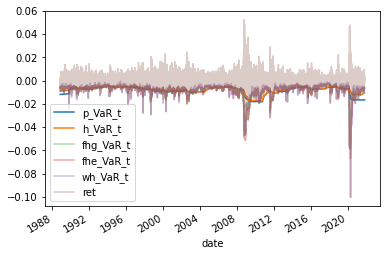

In [394]:
df_eval[['p_VaR_t','h_VaR_t']].plot()
df_eval['fhg_VaR_t'].plot(alpha=0.4)
df_eval['fhe_VaR_t'].plot(alpha=0.4)
df_eval['wh_VaR_t'].plot(alpha=0.4)
df_eval['ret'].plot(alpha=0.3)
plt.legend()

In [382]:
VaR_t=pd.DataFrame(index=df_eval.index, columns= ['p_VaR_t','h_VaR_t','fhg_VaR_t','fhe_VaR_t','wh_VaR_t'])

VaR_t['p_VaR_t']= df_eval['ret']<df_eval['p_VaR_t']
VaR_t['h_VaR_t']= df_eval['ret']<df_eval['h_VaR_t']
VaR_t['fhg_VaR_t']= df_eval['ret']<df_eval['fhg_VaR_t']
VaR_t['fhe_VaR_t']= df_eval['ret']<df_eval['fhe_VaR_t']
VaR_t['wh_VaR_t']= df_eval['ret']<df_eval['wh_VaR_t']

VaR_t_2=VaR_t.groupby(pd.Grouper(freq='Y')).sum()
pd.DataFrame(columns=['Average Number of Excedences per Year'],data=VaR_t_2.mean().round(2))

,Average Number of Excedences per Year
p_VaR_t,11.12
h_VaR_t,13.00
fhg_VaR_t,9.82
fhe_VaR_t,10.91
wh_VaR_t,15.88


<AxesSubplot:xlabel='date'>

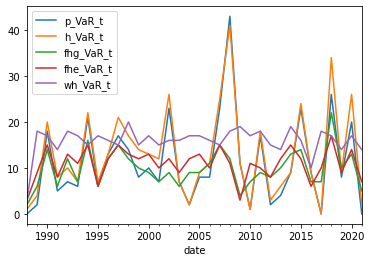

In [383]:
VaR_t_2.plot()

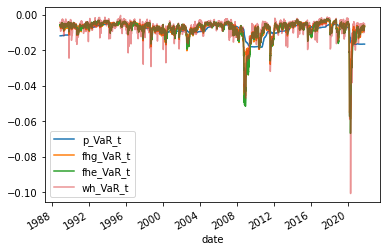

In [395]:
df_eval[['p_VaR_t','fhg_VaR_t','fhe_VaR_t']].plot()
df_eval['wh_VaR_t'].plot(alpha=0.5)
plt.legend()